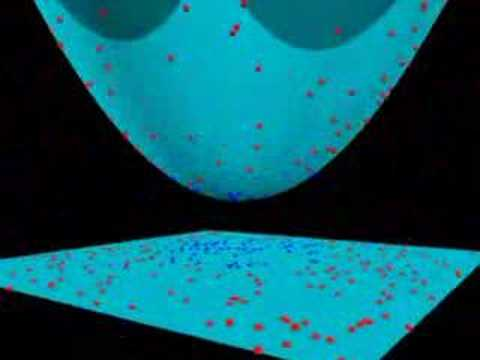

In [6]:
# Support Vecto Machine

# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

In [7]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
# Support Vector Machine Imports
from sklearn.svm import SVC

In [19]:
# Fit a SVM model to the data
model = SVC(gamma='auto')

In [20]:
from sklearn.model_selection import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [21]:
# Fit the model
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
from sklearn import metrics

# Get predictions
predicted = model.predict(X_test)
expected = Y_test

# Compare results
print (metrics.accuracy_score(expected,predicted))

0.9736842105263158


In [33]:
# Import all SVM 
from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', gamma='auto', max_iter=-1, C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3,gamma='auto', C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [35]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


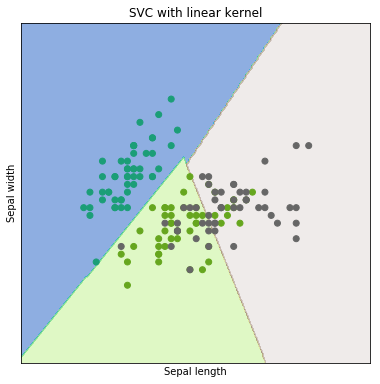

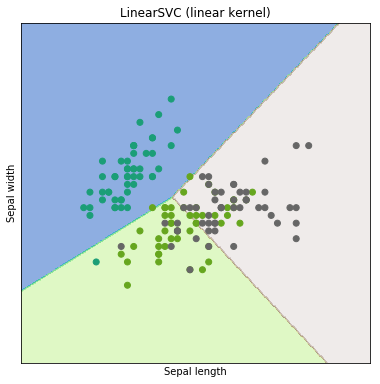

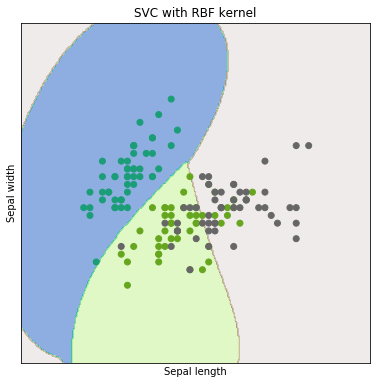

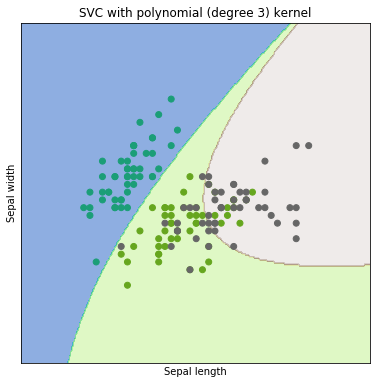

In [36]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()